# Introduction


Correlation matrices are a common tool in the analysis of statistical relations in complicated systems with many observed random variables. In the age of big data, these matrices are more relevant than ever, with an ever-growing range of applications. While many metrics exist to deal with the wider family of symmetric positive definite (SPD) matrices, the literature developing metrics for correlation matrices is much fresher and offers rich insights, presenting an opportunity for optimizing computation on these manifolds. [1]



## Definitions


We begin with establishing the relevant definitions.

- The **correlation** between two random variables $X$ and $Y$ with expected values $\mu_X, \mu_Y$ and standard deviations $\sigma_X, \sigma_Y$ is $\text{corr}(X, Y) = \frac{\mathbb{E}[(X - \mu_X)(Y- \mu_Y)}{\sigma_X \sigma_Y}$. Note that this assumes the standard deviations are finite and nonzero, a relatively realizable assumption for real datasets.




- Let $X_1, X_2, \cdots, X_n$ be a finite family of random variables. Then the **correlation matrix** $C$ is defined element-wise by $C(i,j) = \text{corr}(X_i, X_j)$.




- A matrix $M$ is **symmetric** if $M = M^T$. 

- A real matrix $M$ is **positive definite** if $x^TMx > 0$ for all $x \neq 0 \in \mathbb{R}^n$.






## Properties

We now examine the most relevant properties of correlation matrices.

- Correlations fall within $[-1,1]$. The correlation of a random variable $X$ with itself is $\text{corr}(X, X) = 1$. Therefore, any correlation matrix has a diagonal with all entries $1$.

- Note that correlation is a symmetric relation between two random variables. Thus any correlation matrix will be symmetric.

- Correlation matrices in general may not be full rank. However, under certain independence assumptions (that no random variable is generated as linear comination of others), we can prove correlation matrices are always realized as full rank matrices. These full-rank correlation matrices will be positive definite, and thus are a special case of SPD matrices.

This provides a convenient embedding. Because correlation matrices are symmetric, and we know a priori the diagonal entries, there are only $\frac{n(n-1)}{2}$ entries that are free. Thus, any $n \times n$ correlation matrix can be embedded as a point in $\mathbb{R}^{\frac{n(n-1)}{2}}$.

Note that this straightforward embedding has many desirable properties. Based on only the restrictions of each entry to $[-1,1]$, this maps correlation matrices to a subset of the cube of side length $2$ centered at the origin.

We do not actually realize the entire cube as the manifold structure due to the full rank condition; the maifold actually created by this embedding is an elliptope. Elliptopes are convex subsets of $\mathbb{R}^{\frac{n(n-1)}{2}}$, which presents favorable properties for many optimization problems using standard convex analysis methods.



Finally, we note that SPD matrices have an embedding into $\mathbb{R}^{\frac{n(n+1)}{2}}$ as a cone. While this maintains convexity, this more general space loses structure present in our restricted manifold and requires $n$ more dimensions to respresent, which is a significant cost for large $n$. Metrics specifically geared to the task of working with our specific manifold should enjoy much better empirical performance.









## Applied Uses of Correlation Matrices



1. **Kernel Methods**


Kernel methods in machine learning are highly popular and well-developed. Statistical methods such as Gaussian Processes rely on covariance matrices between points to learn unknown functions extremely efficiently. 

If $C$ is a correlation matrix between an indexed family $X_i$, and $V$ is the covariance matrix for $X_i$, then we have $C = \text{diag}(\frac{1}{\sigma_1}, \frac{1}{\sigma_2}, \cdots) V  \text{diag}(\frac{1}{\sigma_1}, \frac{1}{\sigma_2}, \cdots)$. Thus correlation matrices are transformed covariance matrices. Studying the structure of the manifold of correlation matrices may lead practictioners to useful insights on covariance matrices as well. This natural connection lends itself to extensions in the theory of these learning procedures by amenity to rigorous analytical techniques.



2. **Neuroscience**

The connectome data explored below is a central example of the usefulness of correlation matrices in classifying patients from real data measurements. Using specific correlation metrics instead of more general SPD metrics can lead to enhanced results in classification of patients. Recent research [] has confirmed this interesting direction of inquiry. [2]



3. **Structural Modeling**

In the statistical modeling literature, correlation matrices underpin much work in the modern field. Understanding correlations leads to the creation of effective models through the identification of latent variables, and is responsible for many wide results in recent years.



 


# Visualizing the Manifold

We now visualize the elliptope for $3 \times 3$ correlation matrices under the straightforward embedding.

These matrices are of the form:

$$M = \begin{bmatrix} 1 & \alpha & \beta \\ \alpha & 1 & \gamma \\ \beta & \gamma & 1 \end{bmatrix}$$

Note that to ensure the positive definite condition, we need a strictly positive determinant. This determinant is given by:

$$\text{det}(M) = 1 + 2xyz - x^2 - y^2 - z^2 > 0$$

To plot this elliptope, we visualize the boundary setting the determinant equal to zero, as the above is an open condition for set membership.

Imports necessary libraries for graphing.

In [ ]:
import random as rd

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Creates the points that will be graphed.

In [ ]:
def create_matrices(n):
    # creates n vectors of form $(a,b,c)$. These clearly represent
    # full rank correlation matrices given the
    # condtions $a, b, c \in [-1,1]$ and $a^2 + b^2 c^2 - 2abc \leq 1
    n = 0

    matrices = []

    while n < 1000:
        a = rd.uniform(-1, 1)
        b = rd.uniform(-1, 1)
        c = rd.uniform(-1, 1)

        if a**2 + b**2 + c**2 - 2 * a * b * c <= 1:
            matrices.append([a, b, c])

            n += 1
    return np.array(matrices)


 Uses formula from [this](https://math.stackexchange.com/questions/1971193/what-is-the-volume-of-the-3-dimensional-elliptope) forum post in order to create wireframe model.

In [ ]:
def f_pos(x, y):
    # postive radical portion of eliptope
    return x * y + ((x**2) * (y**2) - x**2 - y**2 + 1) ** (1 / 2)


def f_neg(x, y):
    # negative radical portion
    return x * y - ((x**2) * (y**2) - x**2 - y**2 + 1) ** (1 / 2)

Creates an array of heights for a given set of 15 x and y values.

In [ ]:
def f_pos_array(x_ar, y_ar):
    # creates array using f_neg of x and y values
    f_vals = np.empty((15, 15))

    for index, val in np.ndenumerate(f_vals):
        f_vals[index[0]][index[1]] = f_pos(
            x_ar[index[0]][index[1]], y_ar[index[0]][index[1]]
        )
    return f_vals


def f_neg_array(x_ar, y_ar):
    # creates array using f_neg of x and y values
    f_vals = np.empty((15, 15))

    for index, val in np.ndenumerate(f_vals):
        f_vals[index[0]][index[1]] = f_neg(
            x_ar[index[0]][index[1]], y_ar[index[0]][index[1]]
        )
    return f_vals

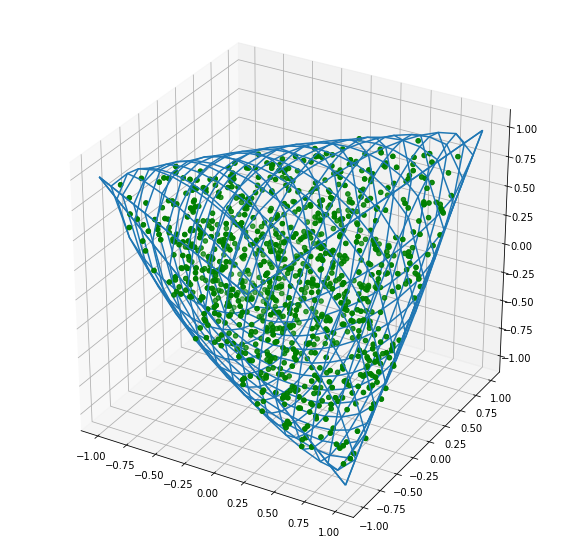

<Figure size 1080x1080 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection="3d")

ar_matrices = create_matrices(1000)

# Slicing array to get x, y, z
x = ar_matrices[:, 0]

y = ar_matrices[:, 1]

z = ar_matrices[:, 2]

# plotting the values
ax.scatter(x, y, z, c="g")

# creating evenly spaced x and y values
x_vals = np.linspace(-1, 1, 15)

y_vals = np.linspace(-1, 1, 15)

# coordinate mesh in order to create a wire frame
xvals, yvals = np.meshgrid(
    x_vals, y_vals
)

fig = plt.figure(figsize=(15, 15))

# getting both halves of the wireframe model
fposvals = f_pos_array(xvals, yvals)

fnegvals = f_neg_array(xvals, yvals)

# plotting both halves of wireframe model

ax.plot_wireframe(xvals, yvals, fposvals)
ax.plot_wireframe(xvals, yvals, fnegvals)

plt.show()

Here we are looking at the correlation matrices of a Healthy brain versus and Schizophrenic brain.

This will be the data points that we will be working with. Our goal is to perform the K nearest neighbors algorith (k = 3) using different metrics.

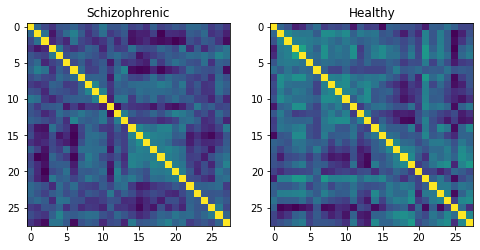

In [ ]:
data, patient_ids, labels = data_utils.load_connectomes()

labels_str = ["Healthy", "Schizophrenic"]

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
imgplot = ax.imshow(data[0])
ax.set_title(labels_str[labels[0]])

ax = fig.add_subplot(122)
imgplot = ax.imshow(data[1])
ax.set_title(labels_str[labels[1]])

plt.show()

KNN Code:

In [ ]:
import geomstats
import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
import geomstats.geometry.full_rank_correlation_matrices as frspd
import geomstats.geometry.spd_matrices as spd
import matplotlib.pyplot as plt
import numpy as np
import pandas
import spd_matrices
from geomstats.learning.preprocessing import ToTangentSpace
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from spd_matrices import (SPDBuresWassersteinMetric, SPDEuclideanMetric,
                          SPDLogEuclideanMetric)

import full_rank_correlation_matrices as fcrm
from full_rank_correlation_matrices import \
    FullRankCorrelationEuclideanCholeskyMetric

data, patient_ids, labels = data_utils.load_connectomes()

data_train, data_test, labels_train, labels_test = train_test_split(
    data, labels, random_state=110, test_size=0.30, shuffle=True
)


def dist_list(data_point, training_data, metric):

    distance_list = np.zeros(len(training_data))
    for i in range(len(training_data)):
        distance_list[i] = metric.dist(data_point, training_data[i])

    return distance_list


def classifyclosestneighbors(dist_list, n):

    dist_list_not_sorted = list(dist_list)
    dist_list.sort()
    knnlist = []
    for i in range(n):
        knnlist.append(labels_train[dist_list_not_sorted.index(dist_list[i])])

    return knnlist


def classifymatrix(traindata, testdata, metric, k):

    classification_list = []

    for i in range(len(testdata)):
        x = dist_list(testdata[i], traindata, metric)
        y = classifyclosestneighbors(x, k)
        if sum(y) >= (k / 2):
            classification_list.append(1)
        else:
            classification_list.append(0)

    return classification_list


def getaccuracy(predicted, actual):
    difference = np.subtract(np.array(predicted), actual)
    accuracy = 1 - abs(sum(difference) / len(difference))
    return accuracy


k = 3

print("Here is Metric Affine")
print(
    "Here are the predicted labels: "
    + str(classifymatrix(data_train, data_test, spd.SPDMetricAffine(28), k))
)
print(
    "Accuracy: "
    + str(
        getaccuracy(
            classifymatrix(data_train, data_test, spd.SPDMetricAffine(28), k),
            labels_test,
        )
    )
)

Here is Metric Affine
Here are the predicted labels: [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
Accuracy: 0.8076923076923077


## Histograms and Metric Analysis

We begin with an overview of common metric definitions. To see a full exploration and analysis of these metrics in a rigorous framework, we recommend the reference [3].

A metric is **geodesically complete** if all geodesics can be extended so they do not hit a manifold boundary in finite time. While this is a hard property to visualize, the Hopf-Rinow Theorem says this occurs for connected manifolds if and only if the metric space is complete.

We also speak of the **curvature** of a metric, refering to the curvature tensor associated with the space under this metric. 

A final property of interest are the **invariances** guaranteed by some metrics, where the structure ensures certain transformations do not affect the measured distance. As one example, if taking inverses does not change the distances between objects, we call the metric **inverse invariant**.


We now examine some metrics of interest and explain their properties.

In [ ]:
def producehist_new(trials, metric, name_of_metric):
    metric_list = []

    for i in range(trials):
        data_train, data_test, labels_train, labels_test = train_test_split(data,labels, random_state=i, test_size=0.30, shuffle=True)

        metric_list.append(getaccuracy(classifymatrix(data_train,data_test,metric,k),labels_test))

    met_ar = np.array(metric_list)

    fig, ax = plt.subplots(figsize =(3, 3))
    ax.hist(met_ar, bins = [0.6,0.65,0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
    plt.xlabel('Accuracy')
    plt.ylabel('No. of trials')
    plt.title(name_of_metric)
    plt.axis([0.58, 1.02, 0, 9.3])

    plt.show()

## Affine Metric

We define the affine-invariant metric [5] between two SPD matrices as:

$$d(A,B) = ||\text{log}(A^{-\frac{1}{2}}BA^{-\frac{1}{2}})||_{F}$$

This is combining two SPD matrices in a way that ensures the product is also SPD, and then leveraging the classical Frobenius norm on the matrix logarithm. This ensures an invariance to affine transforms, congruence relations, and inversion. 

This metric is additionally negatively curved and geodesically complete.

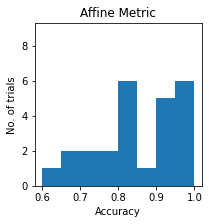

In [ ]:
producehist_new(25, spd.SPDMetricAffine(28), 'Affine Metric')

## Log Euclidean Metric

The Log-Euclidean metric [6] is defined by:

$$d(A,B) = ||\text{log}(A) - \text{log}(B)||$$

This is diffeomorphic to a standard Euclidean inner product, and inherits the expected properties. In particular, it is geodesically complete, not curved, and not affine invariant, though it is inverse invariant.

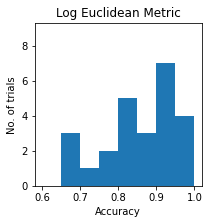

In [ ]:
producehist_new(25, spd.SPDMetricLogEuclidean(28), 'Log Euclidean Metric')

## Euclidean Metric

The Euclidean metric is the standard metric from any introduction to matrix analysis. To define this we treat the matrix as an operator:

$$d(A,B) = \text{sup}_{||x||=1} ||(A-B)x||$$

This can be defined for any standard Euclidean vector norm.

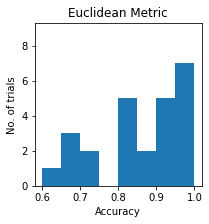

In [ ]:
producehist_new(25, spd_matrices.SPDEuclideanMetric(28), 'Euclidean Metric')

## Bures-Wasserstein Metric

The Bures-Wasserstein metric [4] is defined by:

$$d(A,B) = \sqrt{\text{tr}A + \text{tr}B - 2 \text{tr}(A^{\frac{1}{2}}BA^{\frac{1}{2}})^{\frac{1}{2}}}$$

This is a positively curved metric, which an invariance for orthogonal transformations. Note that this is not geodesically complete.

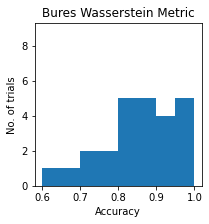

In [ ]:
producehist_new(25, spd_matrices.SPDBuresWassersteinMetric(28), 'Bures Wasserstein Metric')

## Euclidean Cholesky Metric

We consider the group of lower triangular matrices with positive diagonal, $LT^+$. The Euclidean Cholesky metric [7] is defined as the normal Euclidean metric on the Cholesky factor in $LT^+$. As each of our correlation matrices are SPD, they have unique Cholesky decompositions.

For correlation matrices, one issue with this metric is that it is not geodesically complete. Thus, for full rank correlation matrices, we can use the product metric between the Euclidean metric on the strictly lower triangular part of a matrix $A$ with the log Euclidean metric on the diagonal of $A$.

While the wider space of SPD matrices has examples where these metrics differ, for full rank correlation matrices the restrictions are the same and we may consider them together.

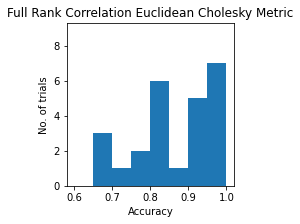

In [ ]:
producehist_new(25, fcrm.FullRankCorrelationEuclideanCholeskyMetric(28), 'Full Rank Correlation Euclidean Cholesky Metric')


# Conclusion

From our empirical results, it appears that all of these metrics have relatively good performance on our clustering task. While there is variance in the results, the proportions of tests resulting in high-accuracy classification results is quite close and high for each option. More analysis should be performed to see exactly where the boundaries of each metric lie. 

This should be a lesson to the practitioner - there are many options for metrics, as one piece of a successful learning algorithm. Many times these options will give similar results, but when there is robust infrastructure for testing, like that present within geomstats, it should be part of any optimal pipeline to test with various metrics and attempt to find the best result. This can lead to theoretical advancements as well as empirical performance improvements.

## References

1. Thanwerdas, Yann and Pennec, Xavier. Theoretically and computationally convenient geometries on full-rank correlation matrices. January 17, 2022. arXiv:2201.06282. 

2. Varoquaux, Gaël and Baronnet, Flore and others. Detection of brain functional-connectivity difference in post-stroke patients using group-level covariance modeling. August 30, 2010. Medical Image Computing and Computer-Assisted Intervention. Springer Berlin Heidelberg. arXiv:1008.5070.

3. Thanwerdas, Yann and Pennec, Xavier. O(n)-invariant Riemannian metrics on SPD matrices. September 13, 2021. arXiv:2109.05768.

4. Bhatia, Rajendra and Jain, Tanvi and Lim, Yongdo. On the Bures-Wasserstein distance between positive definite matrices. December 5, 2017. arXiv:1712.01504.

5. L. T. Skovgaard. A Riemannian Geometry of the Multivariate Normal Model. 1984. Scandinavian Journal of Statistics.

6. Arsigny, Vincent and Fillard, Pierre and Pennec, Xavier and Ayache, Nicholas. Log-Euclidean metrics for fast and simple calculus on diffusion tensors. June 20 2006. Magnetic Resonance in Medicine, Volume 56, Issue 2.

7. Thanwerdas, Yann and Pennec, Xavier. Theoretically and Computationally Convenient Geometries on Full-Rank Correlation Matrices. December 31 2022. SIAM Journal on Matrix Analysis and Applications.